# Noise Power in the Time and Frequency Domains

While I have mostly worked with white noise, Clare has been working with Gaussian noise, where the probability density for obtaining a value y is given by
$$P(y)=\dfrac{1}{\sigma \sqrt{2 \pi}} e^{-(y-y_0)^{2}/(2\sigma{}^{2}},$$
where $y_0$ is the mean value and $\sigma$ the standard deviation of the values.

We should be able to deduce a number of properties of sequences of numbers selected from such a distribution, technically called a *Gaussian Process*. Alas, I lack the statistical background to do this theoretically so let's explore it numerically to build some understanding.

Let's start with the power in a Gaussian signal as a function of the number of samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

I will start by making several samples of noise of different sizes. I am going to use zero-mean and start with a standard deviation of 1.

In [4]:
t100 = np.linspace(0, 100, 100)
t1k = np.linspace(0, 1_000, 1_000)
t10k = np.linspace(0, 10_000, 10_000)
n100 = np.random.normal(loc=0.0, scale=1.0, size=100)
n1k = np.random.normal(loc=0.0, scale=1.0, size=1_000)
n10k = np.random.normal(loc=0.0, scale=1.0, size=10_000)

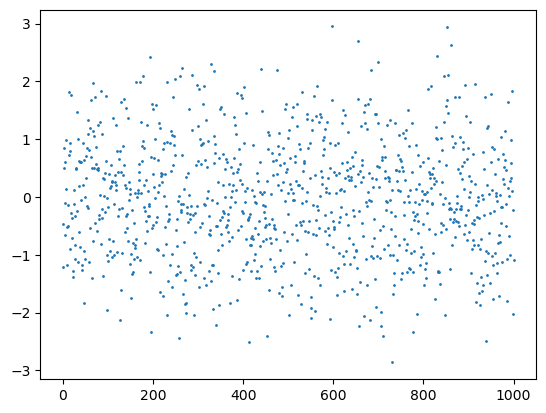

In [5]:
plt.plot(t1k, n1k, '.', markersize=2)

Highly believable. Now compute the squared power in each.

In [6]:
sp100 = np.sum(n100 * n100)
sp1k = np.sum(n1k * n1k)
sp10k = np.sum(n10k * n10k)
print(sp100, sp1k, sp10k)

85.86743324410436 1002.6628049610475 10087.373895883538


That strongly suggests the obvious result that the total power (squared amplitude) simply scales as the number of points.

Now repeat for $\sigma=2$.

In [7]:
n100s2 = np.random.normal(loc=0.0, scale=2.0, size=100)
n1ks2 = np.random.normal(loc=0.0, scale=2.0, size=1_000)
n10ks2 = np.random.normal(loc=0.0, scale=2.0, size=10_000)

In [8]:
sp100s2 = np.sum(n100s2 * n100s2)
sp1ks2 = np.sum(n1ks2 * n1ks2)
sp10ks2 = np.sum(n10ks2 * n10ks2)
print(sp100s2, sp1ks2, sp10ks2)

406.613984239915 4062.3581889568713 39543.08929115671


From this we deduce that if the $x_j$ are chosen from a Gaussian process with zero mean and standard deviation $\sigma$ then
$$\sum_j^Nx_j\simeq{}N\sigma^2.$$

What happens to the standard deviation? My expectation is that the standard deviation simply converges to the appropriate $\sigma$, otherwise it wouldn't be a standard deviation!

In [10]:
print(np.std(n100), np.std(n1k), np.std(n10k))
print(np.std(n100s2), np.std(n1ks2), np.std(n10ks2))

0.926614319827957 1.0007488123676107 1.0043330560504347
1.999136494184721 2.0153197239720373 1.9884993918860254


That seems to confirm that.

Now what happens in the Fourier domain?

In [12]:
f100 = np.fft.rfft(n100)
f1k = np.fft.rfft(n1k)
f10k = np.fft.rfft(n10k)
pf100 = np.sum(f100.conjugate() * f100)
pf1k = np.sum(f1k.conjugate() * f1k)
pf10k = np.sum(f10k.conjugate() * f10k)
print(pf100, pf1k , pf10k)

(4319.354006767914+1.5838231191108406e-15j) (502888.8383339577+9.85814294979933e-13j) (50440681.74364208+2.3879494666715097e-11j)


Interesting!

Parseval says that we should expect that
$$\sum_{j=0}^{N-1}|x_j|^2 = \dfrac{1}{N}\sum_{k=0}^{N-1}|F_k|^2,$$
which would lead us to think that the new sums should be N times the old.

BUT, we did 1-sided DFTs because we used the *rfft* function from *numpy* so that we should have included that in our computations, like this.

In [13]:
print(2 * pf100, 2 * pf1k, 2 * pf10k)

(8638.708013535828+3.167646238221681e-15j) (1005777.6766679154+1.971628589959866e-12j) (100881363.48728415+4.7758989333430194e-11j)


That looks a lot more reasonable. Our first value is close to $10^3 = 100 \times 100$, our second to $10^6 = 1000 \times 1000$, and or third to $10^8 = 10,000 \times 10,000$. This suggests that we sort of know what we are doing and that Parseval's theorem works as expected.

I think that linearity guarantees we are fine for the higher $\sigma$ case but we might just as well check.

In [14]:
f100s2 = np.fft.rfft(n100s2)
f1ks2 = np.fft.rfft(n1ks2)
f10ks2 = np.fft.rfft(n10ks2)
pf100s2 = np.sum(f100s2.conjugate() * f100s2)
pf1ks2 = np.sum(f1ks2.conjugate() * f1ks2)
pf10ks2 = np.sum(f10ks2.conjugate() * f10ks2)
print(2 * pf100s2, 2 * pf1ks2, 2 * pf10ks2)

(42115.44467924453+1.001240061133158e-13j) (4065659.7662610523+4.993298510140643e-12j) (395450102.7630671-5.6492550806788945e-11j)


Those are just four times the $\sigma=1$ values, as expected.